# Detecting temperature targets
##### author: Elizabeth A. Barnes and Noah Diffenbaugh
##### version: v0.1.0

```
conda create --name env-noah python=3.9
conda activate env-noah
pip install tensorflow==2.7.0
pip install tensorflow-probability==0.15.0
pip install --upgrade numpy scipy pandas statsmodels matplotlib seaborn palettable progressbar2 tabulate icecream flake8 keras-tuner sklearn jupyterlab black isort jupyterlab_code_formatter
pip install -U scikit-learn
pip install silence-tensorflow tqdm
conda install -c conda-forge cmocean cartopy
conda install -c conda-forge xarray dask netCDF4 bottleneck
conda install -c conda-forge nc-time-axis
```

Use the command
```python -m pip freeze > requirements.txt```
to make a pip installation list.

Data can be found here:
* https://www.earthsystemgrid.org/dataset/ucar.cgd.cesm2le.atm.proc.monthly_ave.TREFHT/file.html
* https://www.cesm.ucar.edu/projects/community-projects/LENS2/

In [1]:
import xarray as xr
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

import os.path
from os import path
import subprocess


In [10]:
dirName = '/Users/eabarnes/Downloads/'
dirSaveName = '/Users/eabarnes/Downloads/processed/'
dirReMapName = '/Users/eabarnes/Downloads/remap/'

In [ ]:
for exp in ('BSSP370smbb',):#('BHISTsmbb','BSSP370smbb'):
    print('-----' + exp + '-----')
    for var in ('TREFHT',):
        print('-----' + var + '-----')
        for control_decade in (1231, 1251, 1281, 1301): 
            for member in np.arange(10,21):
                print('-----' + str(member) + '-----')

                #---------------------------------------------------------
                filename = 'b.e21.' + str(exp) + '.f09_g17.LE2-' + str(control_decade) + '.0' + str(member) + '.cam.h0.' + str(var) + '*.nc'
                if(exp=='BHISTsmbb'):
                    timetext = '185001-201412'
                elif(exp=='BSSP370smbb'):
                    timetext = '201501-210012'
                else:
                    raise ValueError('no such timetext')
                filename_merge = 'b.e21.' + str(exp) + '.f09_g17.LE2-' + str(control_decade) + '.0' + str(member) + '.cam.h0.' + str(var) + '.' + timetext + '.nc'
                filename_remap = filename_merge[:-3] + '.r180x90.nc'
                #---------------------------------------------------------

                if(os.path.isfile(dirReMapName+filename_remap)==True):
                    print('all files exist, moving on...')
                    continue

                if(os.path.isfile(dirSaveName+filename_merge)==True):
                    print('merge file exists, continue')   
                else:
                    # mergetime
                    runText = 'cdo mergetime ' + dirName+filename + ' ' + dirSaveName+filename_merge 
                    print(runText)
                    process = subprocess.Popen(runText.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()

                if(os.path.isfile(dirReMapName+filename_remap)==True):
                    print('remap file exists, continue')
                else:
                    # remap to 2x2
                    runText = "cdo -select,name='TREFHT' " + dirSaveName+filename_merge + " " + dirReMapName + "outfile.nc"
                    print(runText)
                    process = subprocess.Popen(runText.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()       
                    
                    # remap to 2x2
                    runText = 'cdo remapcon,r180x90 ' + dirReMapName + 'outfile.nc ' + dirReMapName+filename_remap 
                    print(runText)
                    process = subprocess.Popen(runText.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()       

                    # # delete merge file
                    # runText = 'rm ' + dirName+filename_merge
                    # print(runText)
                    # process = subprocess.Popen(runText.split(), stdout=subprocess.PIPE)
                    # output, error = process.communicate()       


In [ ]:
dirName = '/Users/eabarnes/Downloads/'
dirSaveName = '/Users/eabarnes/Downloads/processed/'

for exp in ('BSSP370smbb',):#('BHISTsmbb','BSSP370smbb'):
    # print('-----' + exp + '-----')
    for var in ('TREFHT',):
        # print('-----' + var + '-----')
        for control_decade in (1231, 1251, 1281, 1301): 
            for member in np.arange(10,21):
                # print('-----' + str(member) + '-----')

                #---------------------------------------------------------
                filename = 'b.e21.' + str(exp) + '.f09_g17.LE2-' + str(control_decade) + '.0' + str(member) + '.cam.h0.' + str(var) + '*.nc'
                if(exp=='BHISTsmbb'):
                    timetext = '185001-201412'
                elif(exp=='BSSP370smbb'):
                    timetext = '201501-210012'
                else:
                    raise ValueError('no such timetext')
                filename_merge = 'b.e21.' + str(exp) + '.f09_g17.LE2-' + str(control_decade) + '.0' + str(member) + '.cam.h0.' + str(var) + '.' + timetext + '.nc'
                filename_remap = filename_merge[:-3] + '.r180x90.nc'
                #---------------------------------------------------------

                if(os.path.isfile(dirReMapName+filename_remap)==False):
                    print('missing file: ' + filename_remap)

## Check results by plotting a few things

In [5]:
da = xr.open_dataset(dirSaveName + 'b.e21.BHISTsmbb.f09_g17.LE2-1301.017.cam.h0.TREFHT.185001-201412.nc')
da

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables: (12/14)
    time_bnds  (time, bnds) object ...
    gw         (lat) float64 ...
    date       (time) int32 ...
    datesec    (time) int32 ...
    ndcur      (time) int32 ...
    nscur      (time) int32 ...
    ...         ...
    n2ovmr     (time) float64 ...
    f11vmr     (time) float64 ...
    f12vmr     (time) float64 ...
    sol_tsi    (time) float64 ...
    nsteph     (time) int32 ...
    TREFHT     (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.2 (http://mpimet.mp...
    history:           Fri Mar 04 06:33:41 2022: cdo mergetime /Users/eabarne...
    source:            CAM
    Conventions:       CF-1.0
    case:              b.e21.BHISTsmbb.f09_g17.LE2-1301.017
    logname:           sunseon
    host:              mom2
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1301-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    CDO:               Climate Data Operators version 1.9.2 (http://mpimet.mp...

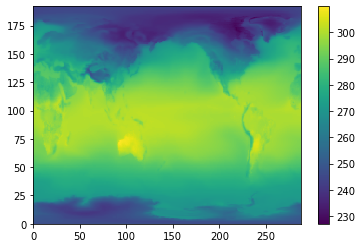

In [6]:
plt.pcolor(da['TREFHT'][0,:,:])
plt.colorbar()

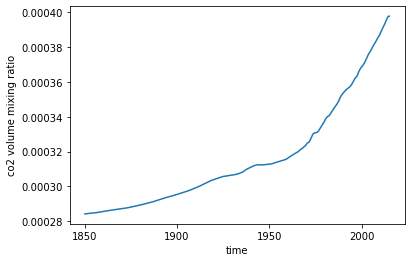

In [7]:
co2 = da['co2vmr']
co2.plot()
plt.show()